#**Smartphones Overview**

Technology keeps advancing at lightning speed, and smartphones now shape how we live, work, and connect. But one common question lingers — does a higher price truly mean better performance?

This project uses Python and data analysis to dig into that mystery. By exploring smartphone specifications, prices, and customer ratings, it uncovers which brands actually deliver the best value for money.

A key focus will be the long-standing rivalry between Samsung and Apple, separating perception from reality and revealing what the data really says.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Smartphones_cleaned_dataset.csv")
dataset.head()

# This dataset was gotten from kaggle and it's price column is in INR i.e Indian Rupees
# So I will have to change it to Naira since that's the currency we are meant to work with as Nigerians

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [4]:
print(dataset.info())

# Luckily for me, from my output, we can see that the datatype of each column corresponds.
# Due to this, there wont be any need to change the datatype of a column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [5]:
print(dataset.describe())

               price      rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082   78.258248    7.772074         2.427217   
std     39531.812669    7.402854    0.836845         0.464090   
min      3499.000000   60.000000    4.000000         1.200000   
25%     12999.000000   74.000000    8.000000         2.050000   
50%     19994.500000   80.000000    8.000000         2.300000   
75%     35491.500000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        969.000000               980.000000     769.000000    980.000000   
mean        4817.748194                 0.854082      46.126138      6.560204   
std         1009.540054                 0.353205      34.277870      2.744378   
min         1821.000000                 0.000000      10.000000      1.000000   
25%      

In [6]:
dataset.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


In [7]:
dataset.fillna(0, inplace=True)

In [8]:
dataset.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,0
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,0
num_cores,0
processor_speed,0


In [9]:
dataset.value_counts("brand_name")

,count
brand_name,
xiaomi,134
samsung,132
vivo,111
realme,97
oppo,88
motorola,52
apple,46
oneplus,42
poco,41


In [10]:
dataset["price"].head()

,price
0,54999
1,19989
2,16499
3,14999
4,24999


In [11]:
dataset["price_naira"] = dataset["price"]*16.70 # Since an indian rupee is 16.70 naira
print(dataset["price_naira"].head())

0    918483.3
1    333816.3
2    275533.3
3    250483.3
4    417483.3
Name: price_naira, dtype: float64


In [12]:
dataset.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,3,1.0,android,50.0,16.0,0,0.0,1440,3216,918483.3
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,333816.3
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,3,1.0,android,50.0,16.0,1,1024.0,1080,2400,250483.3
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,3,1.0,android,108.0,16.0,0,0.0,1080,2412,417483.3


In [13]:
price_brand = dataset.groupby("brand_name")["price_naira"].mean()
max_brand= price_brand.idxmax()
max_price= price_brand.max()

min_brand= price_brand.idxmin()
min_price= price_brand.min()

print(f"The brand with the hightest price is {max_brand.capitalize()} with a mean price of ₦{max_price}")
print(f"The brand with the lowest price is {min_brand.capitalize()} with a mean price of ₦{min_price}")

The brand with the hightest price is Vertu with a mean price of ₦10855000.0
The brand with the lowest price is Lyf with a mean price of ₦65798.0


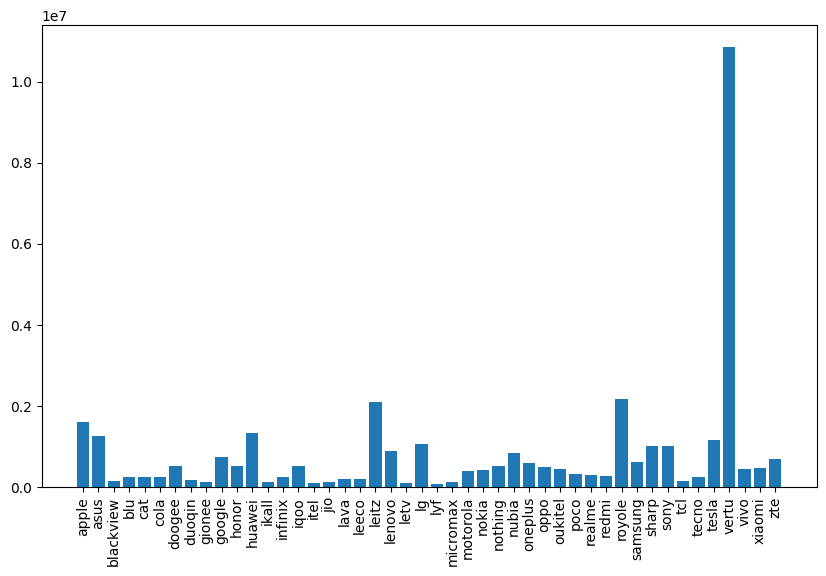

In [14]:
brand_avg = dataset.groupby("brand_name")["price_naira"].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(brand_avg["brand_name"], brand_avg["price_naira"])
plt.xticks(rotation=90)
plt.show()


In [15]:
top_phones = dataset[dataset["brand_name"].isin(["apple", "samsung", "xiaomi", "infinix", "huawei", "vivo", "oppo", "realme", "tecno", "google"])]

top_phones.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,3,1.0,android,108.0,16.0,0,0.0,1080,2412,417483.3
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,50.0,8.0,1,1024.0,1080,2408,283883.3
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,2,1.0,ios,12.0,12.0,0,0.0,1170,2532,1102183.3
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,3,1.0,android,200.0,16.0,0,0.0,1080,2400,500983.3


In [16]:
top_phones.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height', 'price_naira'],
      dtype='object')

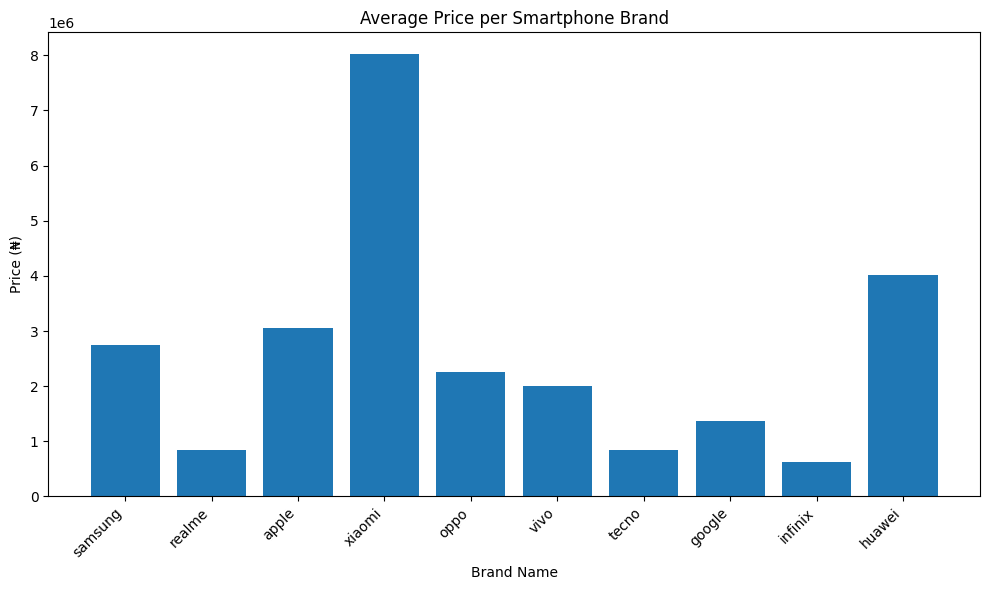

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(top_phones["brand_name"], top_phones["price_naira"])
plt.xticks(rotation=45, ha='right')  # keeps the labels readable
plt.xlabel("Brand Name")
plt.ylabel("Price (₦)")
plt.title("Average Price per Smartphone Brand")
plt.tight_layout()  # avoids overlapping labels
plt.show()

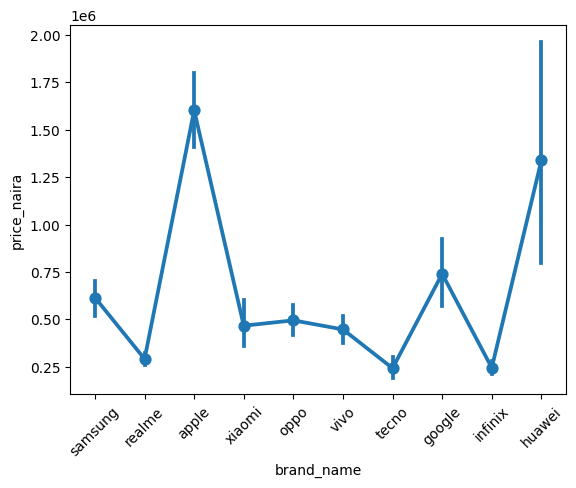

In [18]:
sns.pointplot(data=top_phones,x="brand_name", y="price_naira")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2723478529.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_phones, x="brand_name",y="rating",hue="brand_name",ci=None)


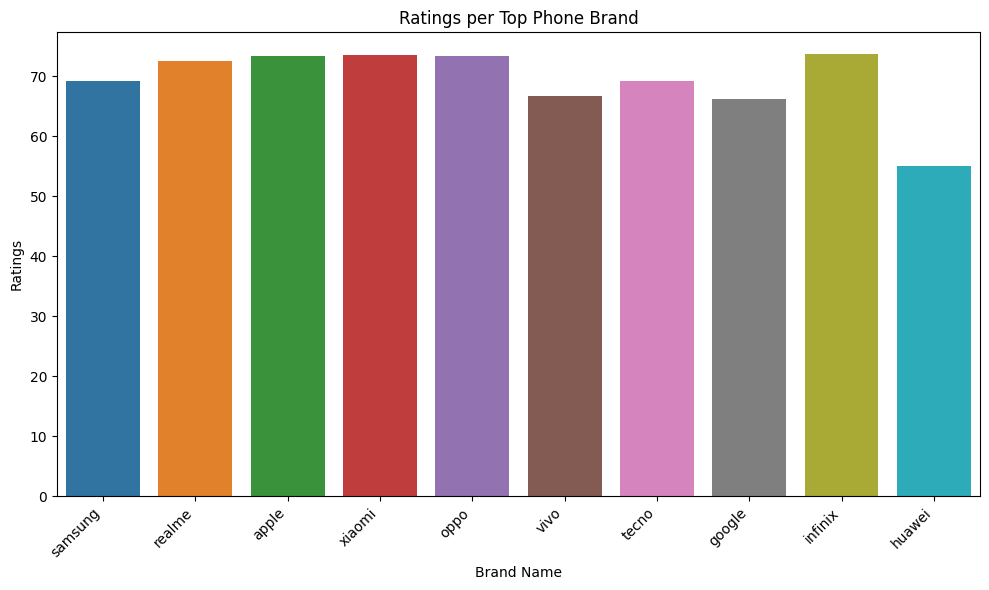

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_phones, x="brand_name",y="rating",hue="brand_name",ci=None)
plt.xticks(rotation=45, ha='right')  # keeps the labels readable
plt.xlabel("Brand Name")
plt.ylabel("Ratings")
plt.title("Ratings per Top Phone Brand")
plt.tight_layout()  # avoids overlapping labels
plt.show()

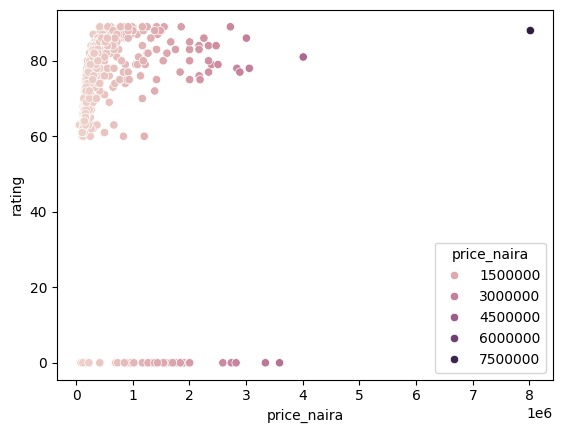

In [20]:
sns.scatterplot(data=top_phones, y="rating", x="price_naira", hue="price_naira")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.5% of the points cannot be plac

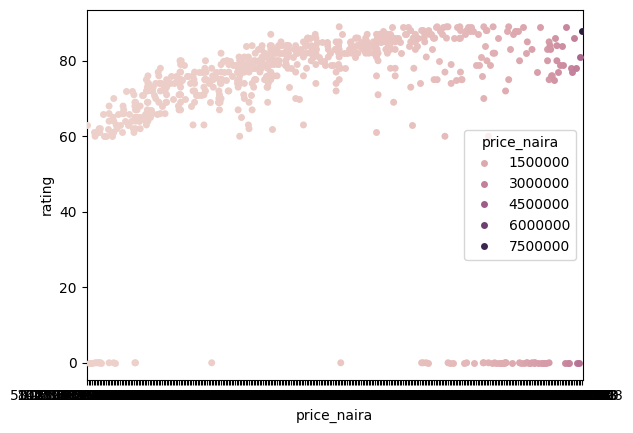

In [21]:
sns.swarmplot(data=top_phones, y="rating", x="price_naira", hue="price_naira")
plt.show()

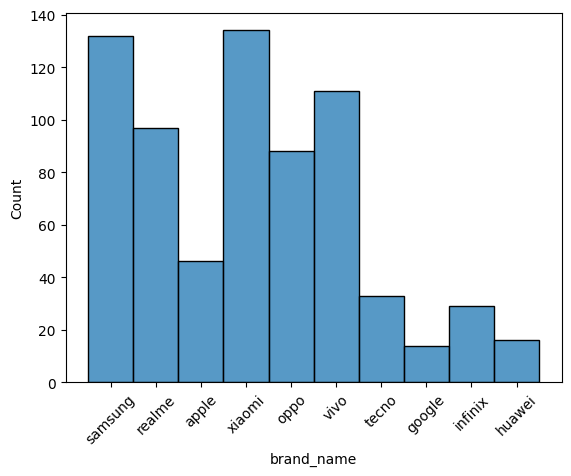

In [22]:
sns.histplot(data=top_phones, x="brand_name")
plt.xticks(rotation=45)
plt.show()

#**Apple And Samsung**
*Price and Camera Comparisons*

In [23]:
app_sam = top_phones[top_phones["brand_name"].isin(["apple", "samsung"])]
app_sam.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,50.0,8.0,1,1024.0,1080,2408,283883.3
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,2,1.0,ios,12.0,12.0,0,0.0,1170,2532,1102183.3
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,0.0,True,True,False,snapdragon,8.0,3.20,...,4,1.0,android,200.0,12.0,0,0.0,1440,3088,1920333.0
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,...,2,1.0,ios,12.0,12.0,0,0.0,1170,2532,1052083.3


In [24]:
cam_avg = app_sam.groupby("brand_name")[["primary_camera_rear", "primary_camera_front"]].mean()

In [25]:
print(cam_avg.head())

            primary_camera_rear  primary_camera_front
brand_name                                           
apple                 20.760870             11.452174
samsung               54.242424             16.734848


In [26]:
cam_avg = cam_avg.reset_index()

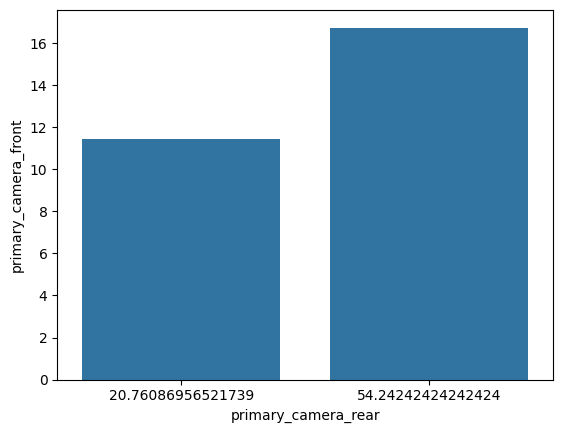

In [27]:
sns.barplot(data=cam_avg, x="primary_camera_rear", y="primary_camera_front")

plt.show()

In [28]:
# Since my data is in wide format, i have to make it long

cam_avg =cam_avg.melt(id_vars="brand_name", var_name="camera_type", value_name= "megapixels")
print(cam_avg.head())

  brand_name           camera_type  megapixels
0      apple   primary_camera_rear   20.760870
1    samsung   primary_camera_rear   54.242424
2      apple  primary_camera_front   11.452174
3    samsung  primary_camera_front   16.734848


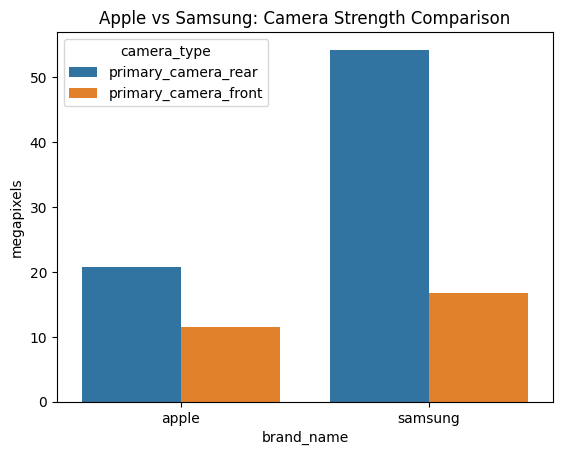

In [29]:
sns.barplot(data=cam_avg, x="brand_name", y="megapixels", hue="camera_type")
plt.title("Apple vs Samsung: Camera Strength Comparison")

plt.show()

In [30]:
price = app_sam.groupby("brand_name")["price_naira"].mean()

In [31]:
price.head()

,price_naira
brand_name,
apple,1.602641e+06
samsung,6.152786e+05


In [32]:
price_df= price.reset_index()

In [33]:
brand_name_series = price_df["brand_name"]  # this is a pandas Series
price_naira_series = price_df["price_naira"]      # another Series

price_df = pd.DataFrame({
    "brand_name": brand_name_series,   # brand column
    "price_naira": price_naira_series  # price column
})

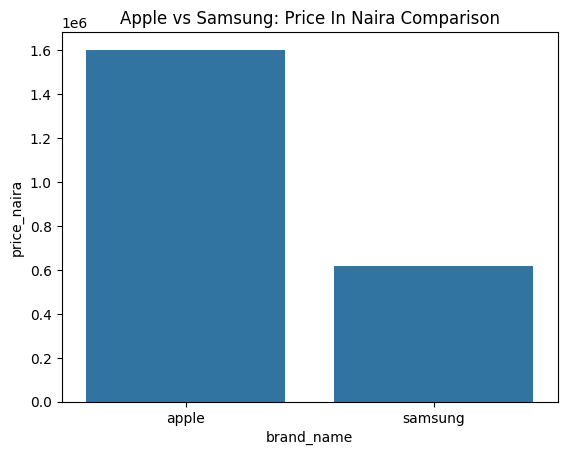

In [34]:
sns.barplot(data=price_df, x="brand_name", y="price_naira")
plt.title("Apple vs Samsung: Price In Naira Comparison")

plt.show()

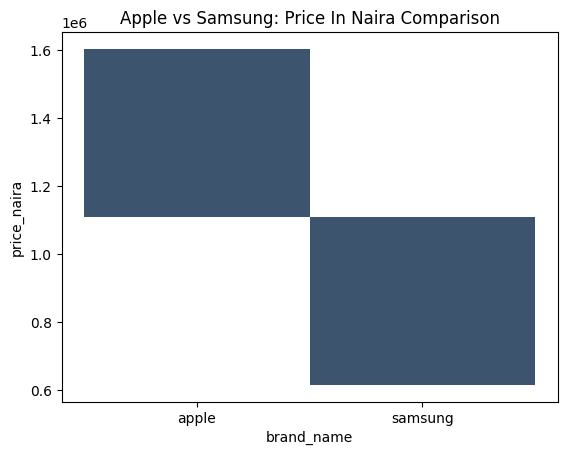

In [35]:
sns.histplot(data=price_df, x="brand_name", y="price_naira")
plt.title("Apple vs Samsung: Price In Naira Comparison")

plt.show()

#**Samsung vs Vertu**

In [36]:
vertu = dataset[dataset["brand_name"] == "vertu"]
vertu

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.5,...,1,1.0,android,13.0,2.1,0,0.0,1080,1920,10855000.0


In [37]:
dataset[dataset["brand_name"] == "samsung"]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,50.0,8.0,1,1024.0,1080,2408,283883.3
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,0.0,True,True,False,snapdragon,8.0,3.20,...,4,1.0,android,200.0,12.0,0,0.0,1440,3088,1920333.0
25,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,True,True,False,snapdragon,8.0,2.84,...,3,1.0,android,12.0,32.0,1,0.0,1080,2400,521691.3
34,samsung,Samsung Galaxy M53 5G,23790,85.0,True,False,False,dimensity,8.0,2.40,...,4,1.0,android,108.0,32.0,1,1024.0,1080,2400,397293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,samsung,Samsung Galaxy A21s (6GB RAM + 128GB),17499,75.0,False,False,False,exynos,8.0,2.00,...,4,1.0,android,48.0,13.0,1,512.0,720,1600,292233.3
952,samsung,Samsung Galaxy A11,9990,63.0,False,False,False,0,8.0,1.80,...,3,1.0,android,13.0,8.0,1,512.0,720,1560,166833.0
955,samsung,Samsung Galaxy A9 Pro (2019),39990,78.0,False,True,False,snapdragon,8.0,2.20,...,3,1.0,android,24.0,24.0,1,512.0,1080,2340,667833.0
956,samsung,Samsung Galaxy A7 (2018),21490,70.0,False,False,False,exynos,8.0,2.20,...,3,1.0,android,24.0,24.0,1,512.0,2220,1080,358883.0


In [38]:
max_sam = dataset[dataset["brand_name"] == "samsung"].loc[lambda x: x["price_naira"].idxmax()]

In [39]:
print(max_sam)

brand_name                                                    samsung
model                        Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)
price                                                          163980
rating                                                            0.0
has_5g                                                           True
has_nfc                                                          True
has_ir_blaster                                                  False
processor_brand                                            snapdragon
num_cores                                                         8.0
processor_speed                                                   3.2
battery_capacity                                               4400.0
fast_charging_available                                             1
fast_charging                                                    25.0
ram_capacity                                                       12
internal_memory     

#**Conditional Formatting**



In [40]:
dataset["price_naira"]

,price_naira
0,918483.3
1,333816.3
2,275533.3
3,250483.3
4,417483.3
...,...
975,584333.0
976,250333.0
977,484133.0
978,333833.0


In [41]:
high_price= dataset[dataset["price_naira"] > 2500000]
gb= high_price.groupby("brand_name")["price_naira"].count()
print(gb)

brand_name
apple      5
huawei     4
royole     1
samsung    2
vertu      1
xiaomi     2
Name: price_naira, dtype: int64


In [42]:
gb = gb.reset_index()

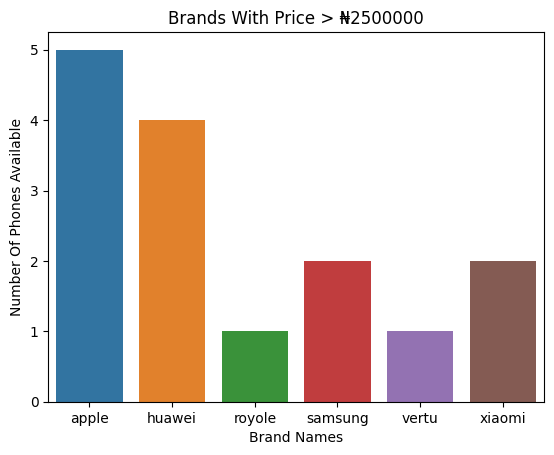

In [43]:
sns.barplot(data=gb, x="brand_name", y="price_naira", hue="brand_name")
plt.title("Brands With Price > ₦2500000")
plt.xlabel("Brand Names")
plt.ylabel("Number Of Phones Available")
plt.show()

In [44]:
dataset

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,3,1.0,android,50.0,16.0,0,0.0,1440,3216,918483.3
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,333816.3
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,3,1.0,android,50.0,16.0,1,1024.0,1080,2400,250483.3
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,3,1.0,android,108.0,16.0,0,0.0,1080,2412,417483.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,3,1.0,android,64.0,16.0,0,0.0,1080,2460,584333.0
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,3,1.0,android,48.0,8.0,1,1024.0,720,1600,250333.0
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,3,1.0,android,64.0,16.0,0,0.0,1080,2460,484133.0
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,108.0,32.0,1,1024.0,1080,2400,333833.0


In [45]:
model = dataset["model"].value_counts()
model.head()

,count
model,
Samsung Galaxy M52s 5G,1
OnePlus 11 5G,1
OnePlus Nord CE 2 Lite 5G,1
Samsung Galaxy A14 5G,1
Lava X3,1


In [46]:
model.max()

1

In [47]:
dataset["processor_brand"].unique()

array(['snapdragon', 'exynos', 'dimensity', 'bionic', 'helio', 'unisoc',
       'tiger', 0, 'google', 'sc9863a', 'spreadtrum', 'fusion', 'kirin',
       'mediatek'], dtype=object)

In [58]:
brands_processor_list = dataset["processor_brand"].value_counts().index.tolist()
print(brands_processor_list[:6])

['snapdragon', 'helio', 'dimensity', 'exynos', 'bionic', 'unisoc']


In [65]:
pb= dataset["processor_brand"].isin(["snapdragon", "helio", "dimensity", "exynos", "bionic", "unisoc"])
tp = dataset["brand_name"].isin(top_phones["brand_name"])
top_pro_phones = dataset[pb & tp]

top_pro_phones.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_naira
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,275533.3
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,3,1.0,android,108.0,16.0,0,0.0,1080,2412,417483.3
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,50.0,8.0,1,1024.0,1080,2408,283883.3
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,2,1.0,ios,12.0,12.0,0,0.0,1170,2532,1102183.3
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,3,1.0,android,200.0,16.0,0,0.0,1080,2400,500983.3


In [66]:
gb1= top_pro_phones.groupby("brand_name")["processor_brand"].value_counts()
gb1

brand_name  processor_brand
apple       bionic             45
google      snapdragon          5
huawei      snapdragon          8
infinix     helio              20
            dimensity           6
oppo        snapdragon         42
            dimensity          23
            helio              23
realme      snapdragon         32
            dimensity          27
            helio              16
            unisoc              7
samsung     exynos             50
            snapdragon         36
            helio              20
            dimensity          11
            unisoc              3
tecno       helio              23
            dimensity           6
            unisoc              2
vivo        snapdragon         48
            dimensity          32
            helio              31
xiaomi      snapdragon         67
            dimensity          36
            helio              31
Name: count, dtype: int64

In [67]:
gb1.reset_index()

,brand_name,processor_brand,count
0,apple,bionic,45
1,google,snapdragon,5
2,huawei,snapdragon,8
3,infinix,helio,20
4,infinix,dimensity,6
5,oppo,snapdragon,42
6,oppo,dimensity,23
7,oppo,helio,23
8,realme,snapdragon,32
9,realme,dimensity,27


<Figure size 1000x600 with 0 Axes>

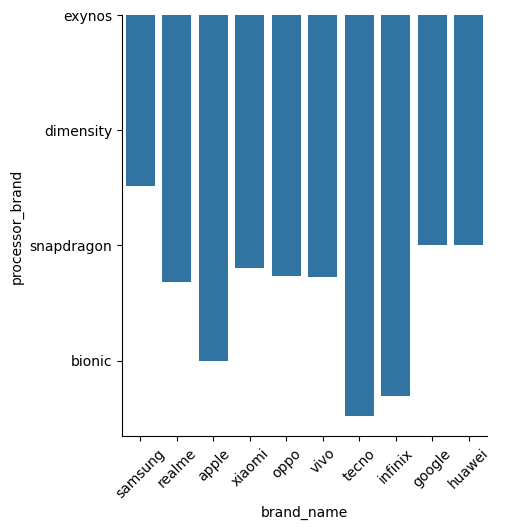

In [68]:
plt.figure(figsize=(10, 6))

sns.catplot(x="brand_name", y="processor_brand", data=top_pro_phones, kind="bar", errorbar=None)
plt.xticks(rotation=45)
plt.show()

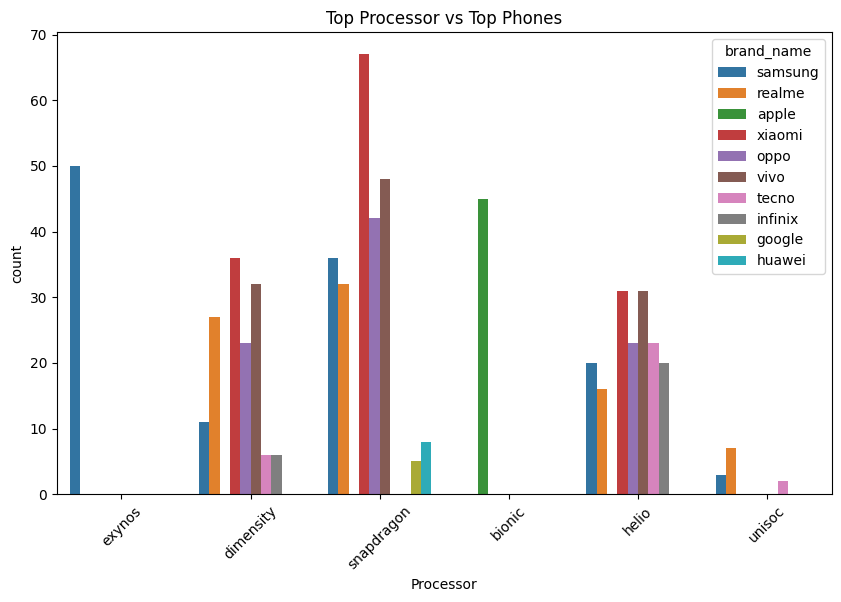

In [69]:
plt.figure(figsize=(10, 6))

sns.countplot(data=top_pro_phones, x="processor_brand", hue="brand_name")
plt.xlabel("Processor")
plt.title("Top Processor vs Top Phones")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


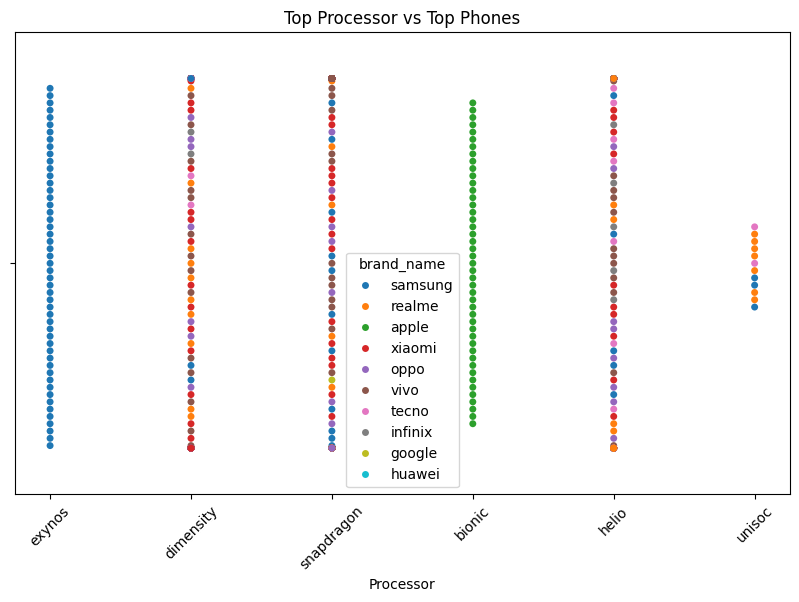

In [53]:
plt.figure(figsize=(10, 6))

sns.swarmplot(data=top_pro_phones, x="processor_brand", hue="brand_name")
plt.xlabel("Processor")
plt.title("Top Processor vs Top Phones")
plt.xticks(rotation=45)
plt.show()

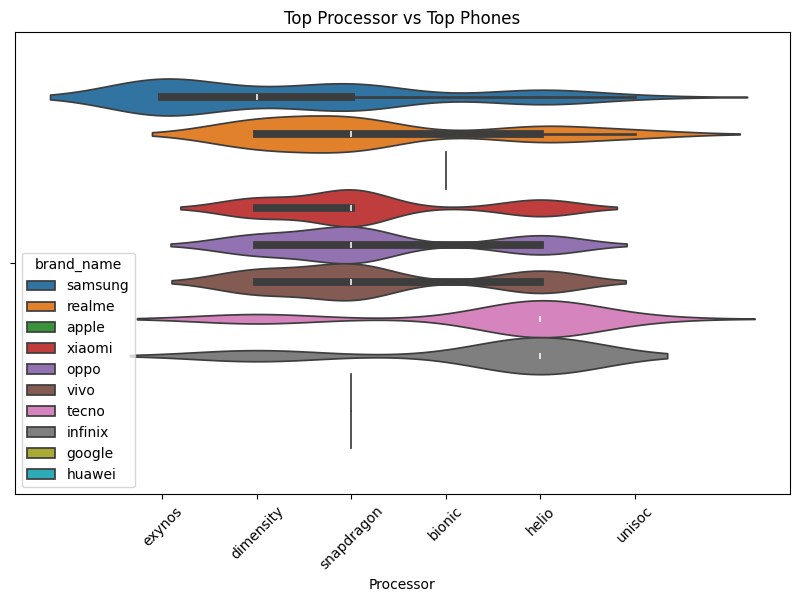

In [54]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=top_pro_phones, x="processor_brand", hue="brand_name")
plt.xlabel("Processor")
plt.title("Top Processor vs Top Phones")
plt.xticks(rotation=45)
plt.show()